# Folgen die gemeldeten Coronainfektionen Benfords Gesetz?

Benfords Gesetzt besagt, dass in vielen Datensätzen das Auftreten der ersten von Null verschiedenen Ziffer einer logarithmischen Verteilung folgt. Genauer, dass gilt:  
$ P(D_1= d) = \log_{10}\left(1+\dfrac{1}{d}\right) \text{ für } d = 1,2,\ldots,9 $ 
 
Exemplarisch wird hier untersucht, ob die gemeldeten kumulierten Infektionszahlen der Covid-19 Pandemie Benfords Gesetz folgen. Als Datenquelle werden die Zahlen der Johns Hopkins University verwendet. Diese enthalten für 189 Länder die Fallzahlen vom 22.01.2020 bis zum 12.05.2021. - insgesamt 80695 Datenpunkte.

In einem Nature Artikel wird behauptet, dass die kumulierten Infektions und Todeszahlen in vielen Ländern (USA, Japan, Europa) Benfords Gesetz folgen. 
https://www.nature.com/articles/d41586-020-01565-5

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log10, floor
from scipy.stats import chisquare
plt.rcParams['figure.figsize'] = [12, 6]

In [8]:
benford = Benford()

## Fallzahlen für alle Länder

In [11]:
# Importiere Daten und entferne Daten auf Provinzebene und Nullwerte
data = pd.read_csv('./data/time_series_covid19_confirmed_global_narrow.csv', skiprows=[1], low_memory=False)
data = data[data['Province/State'].isna() & (data.Value > 0)]

In [12]:
data.head()

Province/State Country/Region       Lat       Long        Date  Value  \
0            NaN    Afghanistan  33.93911  67.709953  2021-05-12  62718   
1            NaN    Afghanistan  33.93911  67.709953  2021-05-11  62403   
2            NaN    Afghanistan  33.93911  67.709953  2021-05-10  62063   
3            NaN    Afghanistan  33.93911  67.709953  2021-05-09  61842   
4            NaN    Afghanistan  33.93911  67.709953  2021-05-08  61755   

  ISO 3166-1 Alpha 3-Codes  Region Code  Sub-region Code  \
0                      AFG        142.0             34.0   
1                      AFG        142.0             34.0   
2                      AFG        142.0             34.0   
3                      AFG        142.0             34.0   
4                      AFG        142.0             34.0   

   Intermediate Region Code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [13]:
sample = list(data.Value)

In [15]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000    31.611624
2      17.609126    17.852407
3      12.493874    11.966045
4       9.691001     8.980730
5       7.918125     7.783630
6       6.694679     5.825640
7       5.799195     5.939649
8       5.115252     5.108123
9       4.575749     4.932152

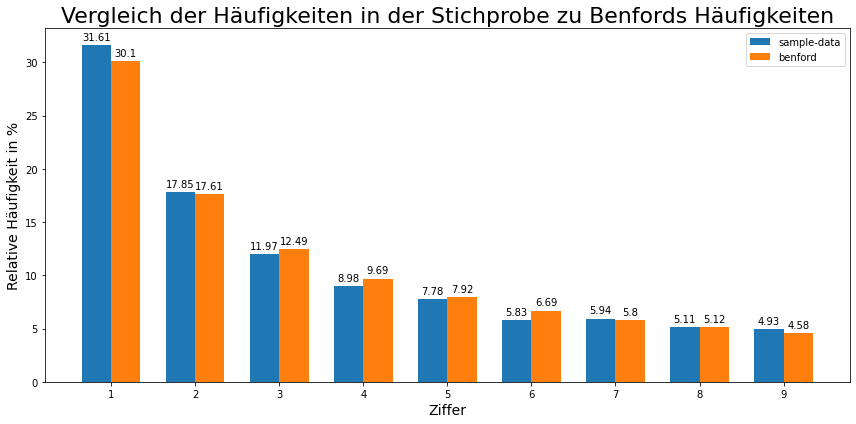

In [18]:
fig = benford.table_to_barblot(table)

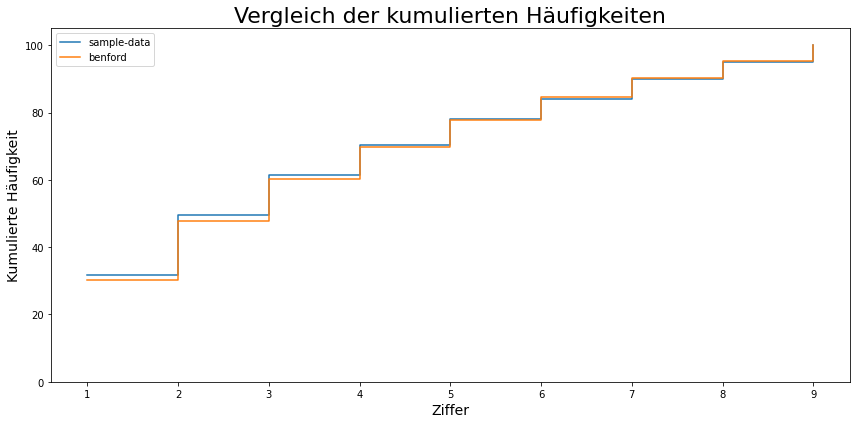

In [20]:
fig = benford.table_to_distribution_plot(table)

## Abweichung von Benfords Gesetz
Berger und Hill schlagen unter anderem folgende Berechnung für den Abstand zu Benfords Gesetz vor:  
$\Delta = 100\cdot \max_{d=1}^9 \left\lvert P(D_1=d) - \log_{10}\left( 1 + \dfrac{1}{d} \right) \right\rvert$ 

Eine weitere Metrik für den Abstand zu Benfords Verteilung ist der MAD Wert. 
 
$ MAD = \sum_{i=1}^9 \frac{|n_i - b_i|}{9} $  
Wobei $b_i$ die Häufigkeiten aus Benfords Gesetz und $n_i$ die beobachteten Häufigkeiten sind.

In [22]:
table['difference'] = abs(table['sample_data'] - table['benford'])

In [23]:
print(f"Die Größte Abweichung beträgt {round(table.difference.max(),2)} % für die Ziffer {table.difference.idxmax()}.")

Die Größte Abweichung beträgt 1.51 % für die Ziffer 1.


In [24]:
print(f"MAD = {benford.table_to_mad(table)}.")

MAD = 0.00499725162164454.


## Anpassungstests

Weder der Deltawert noch der MAD-Wert sind statistische Tests. Auch wenn letzterer dazu erweitert werden kann. Siehe [hier](https://www.springerprofessional.de/en/is-the-benford-law-useful-for-data-quality-assessment/19165338). 
Ein weit verbreiteter statistische Test - insbesondere im [Finanzbereich](https://www.pnas.org/content/116/1/106) - ist der Chi-Quadrat Test. 

$\chi^2 = n \sum_{i=1}^9 \frac{(n_i/n - b_i)^2}{b_i}$  
Wobei $b_i$ die Häufigkeiten aus Benfords Gesetz und $n_i$ die beobachteten Häufigkeiten sind.
Ist $X^2 > X_{1-\alpha, 8}^2$ so wird die Hypothese dass die Stichprobe Benfords Gesetz folg, zum Signifikanzniveau $\alpha$ verworfen.

In [25]:
benford.chi_squared_test(sample)

241.75359480186725

Für ein Signifikanzniveau von 5% liegt der kritische Wert bei 15.51. Nach dem Chi Quadrat Test folgen die nationalen Coronazahlen für alle Ländern nicht Benfords Gesetz. Allerdings reagiert der Test empfindlich bei großen Stichproben (hier n = 80695)

## Betrachtung einzelner Länder

### USA

In [97]:
data = pd.read_csv('./data/time_series_covid19_confirmed_global_narrow.csv', skiprows=[1], low_memory=False)
data = data[data['Province/State'].isna() & (data.Value > 0)]
data = data[(data['Country/Region'] == 'US')]

<AxesSubplot:xlabel='Date'>

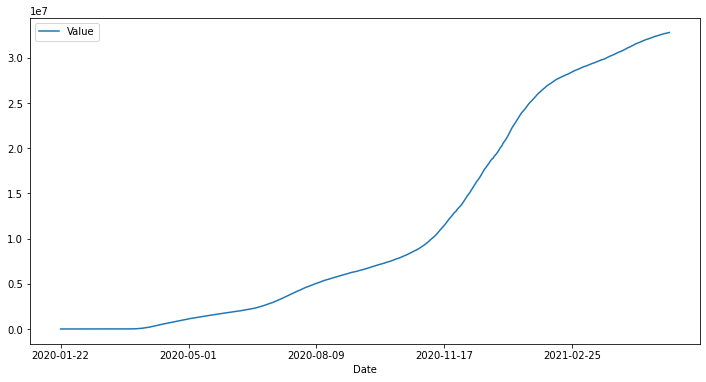

In [98]:
data.sort_values('Date').plot(x='Date', y = 'Value')

In [99]:
sample = list(data.Value)

In [100]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000    28.301887
2      17.609126    25.366876
3      12.493874    15.094340
4       9.691001     4.612159
5       7.918125     7.127883
6       6.694679     6.708595
7       5.799195     6.289308
8       5.115252     3.773585
9       4.575749     2.725367

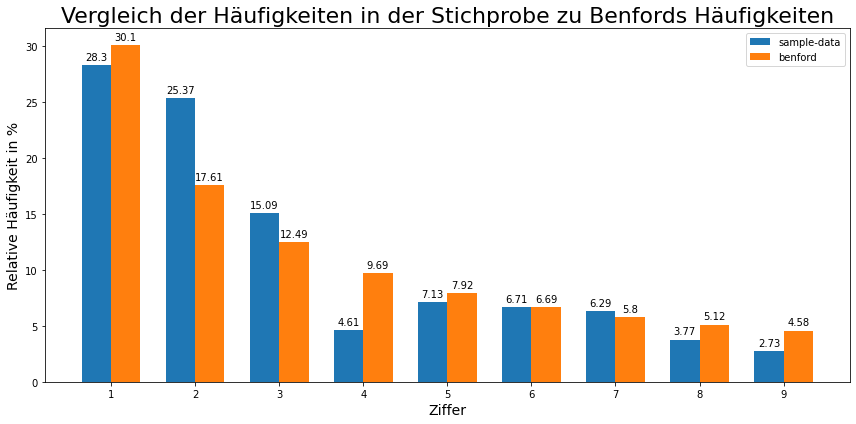

In [101]:
fig = benford.table_to_barblot(table)

In [102]:
benford.chi_squared_test(sample)

37.91637891845406

## Deutschland

In [108]:
data = pd.read_csv('./data/time_series_covid19_confirmed_global_narrow.csv', skiprows=[1], low_memory=False)
data = data[data['Province/State'].isna() & (data.Value > 0)]
data = data[(data['Country/Region'] == 'Germany')]

In [109]:
sample = list(data.Value)

In [110]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000    38.771186
2      17.609126    36.864407
3      12.493874    11.652542
4       9.691001     3.389831
5       7.918125     1.906780
6       6.694679     1.906780
7       5.799195     2.330508
8       5.115252     1.271186
9       4.575749     1.906780

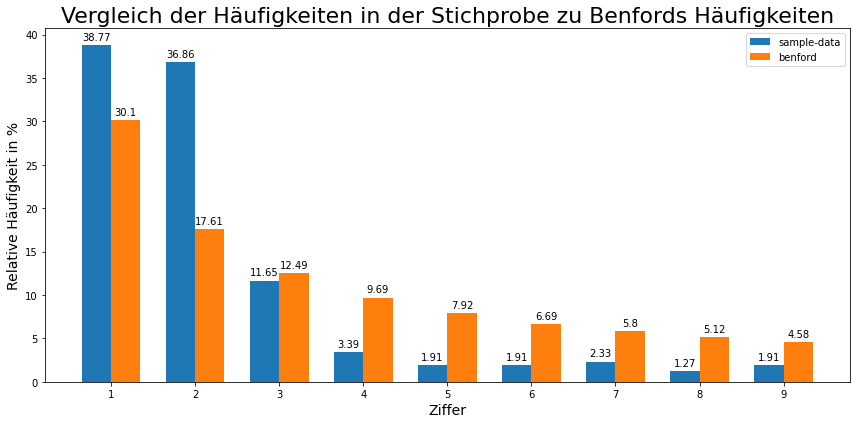

In [111]:
fig = benford.table_to_barblot(table)

In [112]:
benford.chi_squared_test(sample)

199.24678136809717

## Japan

In [131]:
data = pd.read_csv('./data/time_series_covid19_confirmed_global_narrow.csv', skiprows=[1], low_memory=False)
data = data[data['Province/State'].isna() & (data.Value > 0)]
data = data[(data['Country/Region'] == 'Japan')]

In [132]:
sample = list(data.Value)

In [135]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000    31.446541
2      17.609126    14.255765
3      12.493874     7.756813
4       9.691001    16.771488
5       7.918125     7.756813
6       6.694679     6.289308
7       5.799195     5.660377
8       5.115252     5.450734
9       4.575749     4.612159

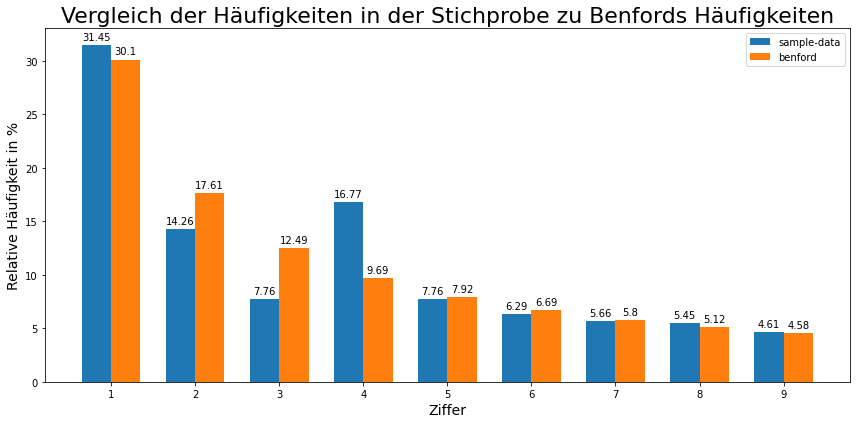

In [136]:
fig = benford.table_to_barblot(table)

In [137]:
benford.chi_squared_test(sample)

36.83032474693859

## Italien

In [213]:
data = pd.read_csv('./data/time_series_covid19_confirmed_global_narrow.csv', skiprows=[1], low_memory=False)
data = data[data['Province/State'].isna() & (data.Value > 0)]
data = data[(data['Country/Region'] == 'Italy')]

In [214]:
sample = data.Value.to_list()

In [215]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000    16.880342
2      17.609126    49.572650
3      12.493874    21.153846
4       9.691001     5.341880
5       7.918125     1.709402
6       6.694679     1.495726
7       5.799195     1.282051
8       5.115252     1.068376
9       4.575749     1.495726

In [216]:
benford.chi_squared_test(sample)

418.7695391574411

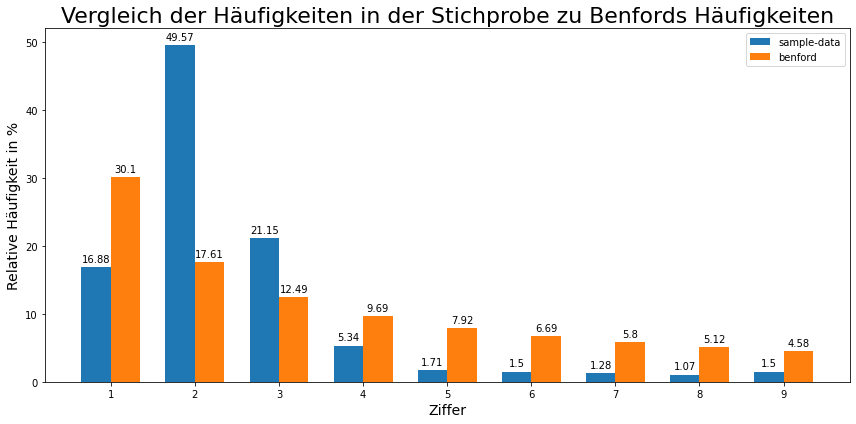

In [217]:
fig = benford.table_to_barblot(table)

In [3]:
class Benford():

    def significant(self, num):
        return 10**(log10(abs(num))-floor(log10(abs(num))))

    def nth_significant_digit(self, num, n=1):
        return floor(self.significant(num)*10**(n-1)) - 10*floor(self.significant(num)*10**(n-2))

    def sample_to_frequency_table(self, sample):
        df = pd.DataFrame(sample)
        df['digit'] = df[0].apply(self.nth_significant_digit)
        digit_count = df.groupby('digit')['digit'].count()
        digit_count = digit_count/sum(digit_count)*100
        b = pd.DataFrame(zip([log10(1+1/d)*100 for d in range(1,10)], range(1,10)), columns=['benford', 'digit']).set_index('digit')
        d = pd.DataFrame(digit_count).rename(columns={'digit':'sample_data'})
        table = b.merge(d, left_index=True, right_index=True, how='outer').fillna(0)
        return table

    def chi_squared_test(self, sample):
        df = pd.DataFrame(sample)
        df['digit'] = df[0].apply(self.nth_significant_digit)
        obs = df.groupby('digit')['digit'].count()
        obs = pd.DataFrame(range(1,10)).set_index(0).merge(obs, right_index=True, left_index=True, how='outer').fillna(0)
        exp = [log10(1+1/d)*len(sample) for d in range(1,10)]
        return sum(abs(obs.digit-exp)**2/exp)
    
    def kolmogorov_smirnov_test(self, table):
        t = table.cumsum()/100
        return max(abs(t.sample_data - t.benford))

    def table_to_distribution_plot(self, table):
        t = table.cumsum()
        fig, ax = plt.subplots()
        ax.step(x=t.index, y=t.sample_data, where='post', label='sample-data')
        ax.step(x=t.index, y=t.benford, where='post', label='benford')
        ax.set_ylabel('Kumulierte Häufigkeit', fontdict={'fontsize':14})
        ax.set_title('Vergleich der kumulierten Häufigkeiten', fontdict={'fontsize':22})
        ax.set_xlabel('Ziffer', fontdict={'fontsize':14})
        ax.set_xticks(t.index)
        ax.set_xticklabels(t.index)
        ax.legend()
        ax.set_ylim([0, 105])
        fig.tight_layout()
        return fig

    def table_to_barblot(self, table):
        width = 0.35
        fig, ax = plt.subplots()
        rects1 = ax.bar(table.index - width/2, round(table['sample_data'],2), width, label='sample-data')
        rects2 = ax.bar(table.index + width/2, round(table['benford'],2), width, label='benford')
        ax.set_ylabel('Relative Häufigkeit in %', fontdict={'fontsize':14})
        ax.set_title('Vergleich der Häufigkeiten in der Stichprobe zu Benfords Häufigkeiten', fontdict={'fontsize':22})
        ax.set_xlabel('Ziffer', fontdict={'fontsize':14})
        ax.set_xticks(table.index)
        ax.set_xticklabels(table.index)
        ax.legend()
        ax.bar_label(rects1, padding=3)
        ax.bar_label(rects2, padding=3)
        fig.tight_layout()
        return fig
    
    def table_to_mad(self, table):
        t = table/100
        return sum(abs(t.sample_data - t.benford))/9